# Hierarichal Clustering

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [6]:
iris = datasets.load_iris()

In [10]:
data = pd.DataFrame(iris.data)

In [12]:
data.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [14]:
data.columns = iris.feature_names

In [16]:
data.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [20]:
data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [26]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [28]:
## Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [30]:
X_scaled = scaler.fit_transform(data)

In [32]:
X_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [34]:
# Apply PCA
from sklearn.decomposition import PCA

In [36]:
pca = PCA(n_components=2)

In [38]:
pca_scaled = pca.fit_transform(X_scaled)

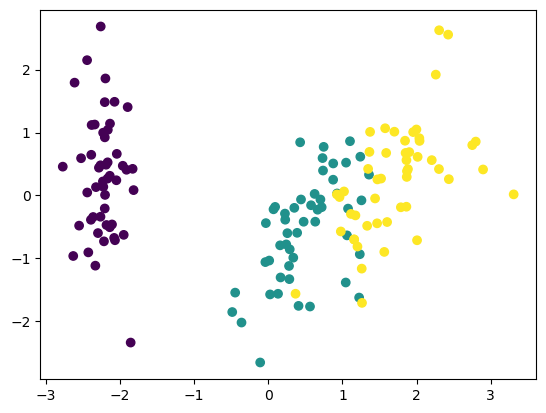

In [40]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1],c=iris.target)

Text(0, 0.5, 'Euclidean Distance')

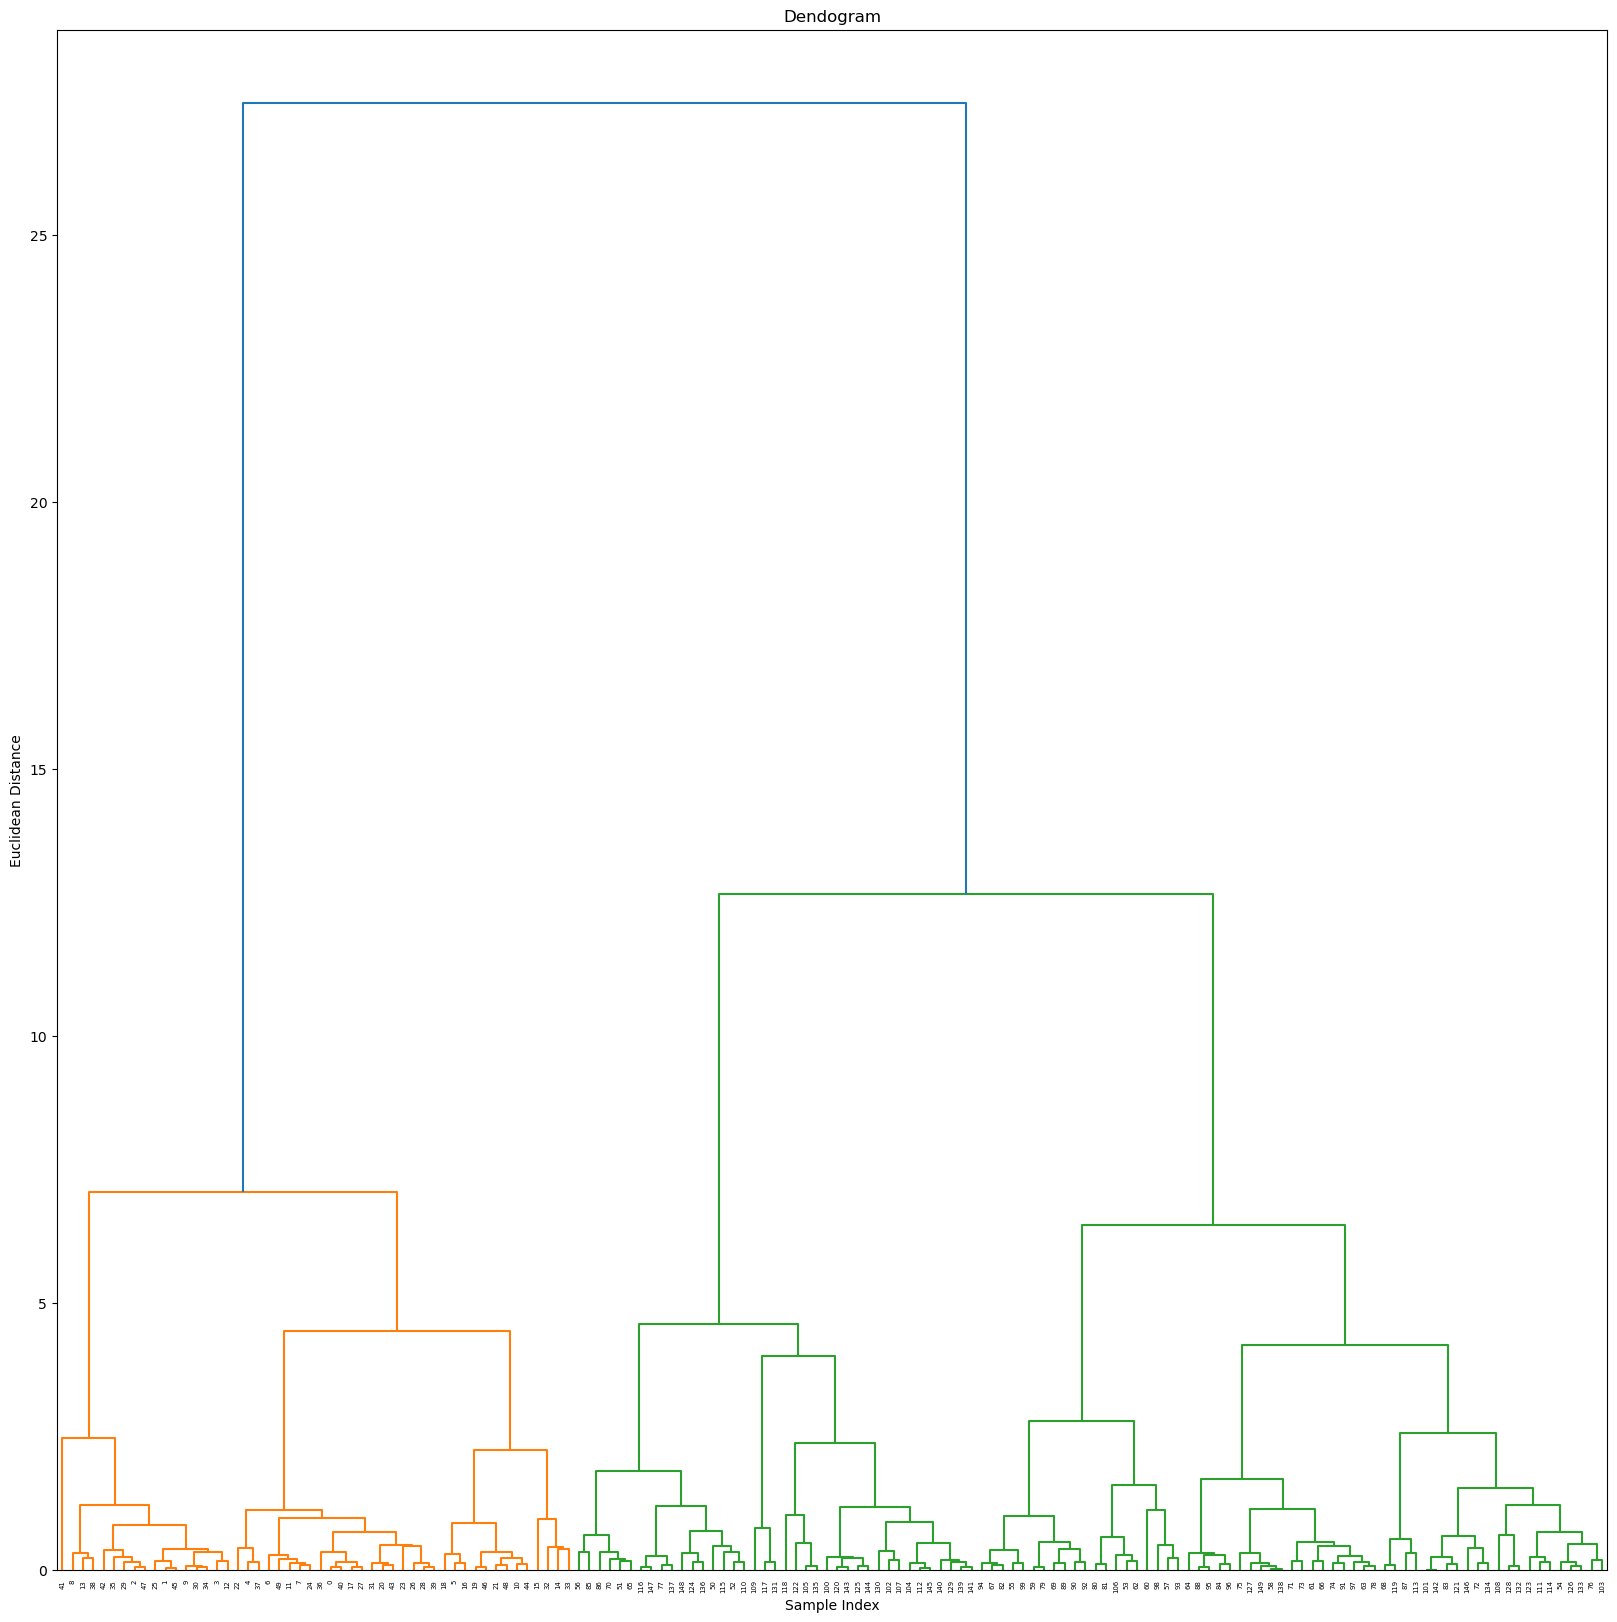

In [54]:
## Agglomerative Clustering
## Construct a Dendogram 
import scipy.cluster.hierarchy as sc
##plot the dendogram
plt.figure(figsize=(20,20))
plt.title("Dendograms")

 #create the dendogram
sc.dendrogram(sc.linkage(pca_scaled, method='ward'))
plt.title('Dendogram')
plt.xlabel("Sample Index")
plt.ylabel("Euclidean Distance")


In [58]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2,metric='euclidean', linkage='ward')
cluster.fit(pca_scaled)

AgglomerativeClustering()

In [62]:
cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

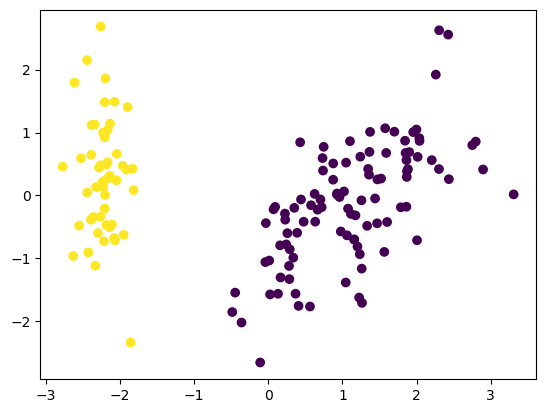

In [64]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1],c=cluster.labels_)

In [68]:
## silhouette's score
from sklearn.metrics import silhouette_score

In [72]:
silhouette_coefficients = []

# Always start with 2 clusters for silhouette coefficient
for k in range(2, 11):
    agglo = AgglomerativeClustering(n_clusters=k,metric='euclidean',linkage='ward')
    agglo.fit(X_scaled)
    score = silhouette_score(X_scaled, agglo.labels_)
    silhouette_coefficients.append(score)

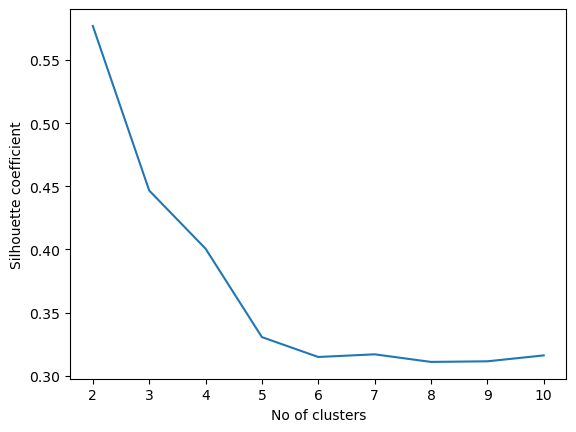

In [74]:
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel('No of clusters')
plt.ylabel('Silhouette coefficient')
plt.show()